# Signal Preocessing and ML


###IMAGE

In [ ]:
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray

In [ ]:
image_1 = image.imread('lena_color.png')
image_2 = image.imread('lena_gray.png')

float32
(512, 512, 3)


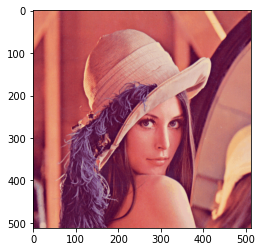

In [ ]:
print(image_1.dtype)
print(image_1.shape)

pyplot.imshow(image_1)
pyplot.show()

float32
(512, 512)


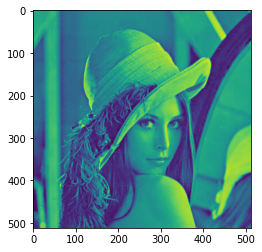

In [ ]:
print(image_2.dtype)
print(image_2.shape)

pyplot.imshow(image_2)
pyplot.show()

In [ ]:
data_1 = asarray(image_1)
print(type(data_1))
print(data_1.shape)
print(data_1)

<class 'numpy.ndarray'>
(512, 512, 3)
[[[0.87058824 0.52156866 0.4745098 ]
  [0.87058824 0.52156866 0.4745098 ]
  [0.8862745  0.5372549  0.5058824 ]
  ...
  [0.8862745  0.5686275  0.4745098 ]
  [0.85490197 0.4745098  0.4117647 ]
  [0.7764706  0.3647059  0.34901962]]

 [[0.87058824 0.52156866 0.4745098 ]
  [0.87058824 0.52156866 0.4745098 ]
  [0.8862745  0.5372549  0.5058824 ]
  ...
  [0.8862745  0.5686275  0.4745098 ]
  [0.85490197 0.4745098  0.4117647 ]
  [0.7764706  0.3647059  0.34901962]]

 [[0.87058824 0.52156866 0.4745098 ]
  [0.87058824 0.52156866 0.4745098 ]
  [0.8862745  0.5372549  0.5058824 ]
  ...
  [0.8862745  0.5686275  0.4745098 ]
  [0.85490197 0.4745098  0.4117647 ]
  [0.7764706  0.3647059  0.34901962]]

 ...

 [[0.3137255  0.0627451  0.21960784]
  [0.3137255  0.0627451  0.21960784]
  [0.34901962 0.07843138 0.20392157]
  ...
  [0.6666667  0.2509804  0.3137255 ]
  [0.68235296 0.2509804  0.28235295]
  [0.6666667  0.21960784 0.28235295]]

 [[0.3137255  0.0627451  0.21960784]

In [ ]:
data_2 = asarray(image_2)
print(type(data_2))
print(data_2.shape)
print(data_2)

<class 'numpy.ndarray'>
(512, 512)
[[0.63529414 0.63529414 0.63529414 ... 0.6666667  0.60784316 0.5019608 ]
 [0.63529414 0.63529414 0.63529414 ... 0.6666667  0.60784316 0.5019608 ]
 [0.63529414 0.63529414 0.63529414 ... 0.6666667  0.60784316 0.5019608 ]
 ...
 [0.16862746 0.16862746 0.19607843 ... 0.40784314 0.39215687 0.38431373]
 [0.17254902 0.17254902 0.21568628 ... 0.40784314 0.4117647  0.42352942]
 [0.17254902 0.17254902 0.21568628 ... 0.40784314 0.4117647  0.42352942]]


###AUDIO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import librosa
import librosa.display

In [ ]:
def readDir(dirname, Fs = 16000):
    audio_files = glob(dirname + '/*.wav')
    x = []

    for t in range(0,len(audio_files),1):
        x1 = load_audio(audio_files[t],Fs)

        time = np.arange(0,len(x1),1)/Fs
        clip = []
        c1 = 0
        c2 = 10
        for j in range(0,len(time),1):
            k = time[j]
            if ((k>=c1) and (k<c2)):
                clip.append(x1[j])
            else:
                clip = np.array(clip)
                x.append(clip)
                clip = []
                clip.append(x1[j])
                c1 += 10
                c2 += 10
        n = len(x[0])
        if len(clip):
            if n!= len(clip):
                for i in range(0,n-len(clip),1):
                    clip.append(0)
            clip = np.array(clip)
            x.append(clip)

    return x 

In [ ]:
def load_audio(filename, Fs = 16000):
    x, sfreq = librosa.load(filename,sr = Fs)
    
    return x

In [ ]:
def audio2mfcc(x, n_mfcc = 20, Fs = 16000):
    X = []
    for i in range(0,len(x),1):
        mfccs = librosa.feature.mfcc(x[i],sr = Fs, n_mfcc = n_mfcc)
        X.append(mfccs.flatten())
    return np.array(X)

In [ ]:
Fs = 16000 # Sampling Frequency
n_mfcc = 20
x_music = readDir('music', Fs) 
x_speech = readDir('speech', Fs)

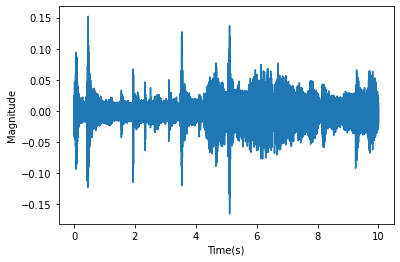

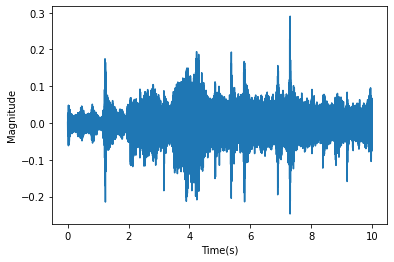

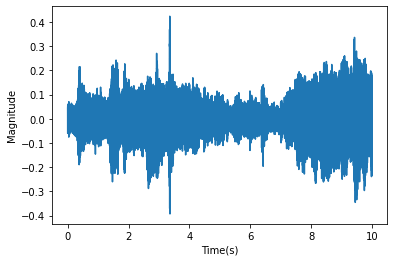

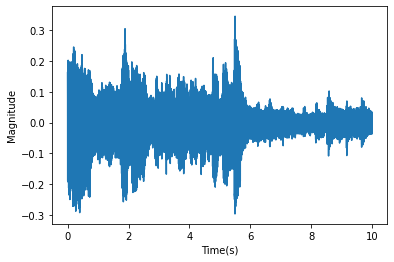

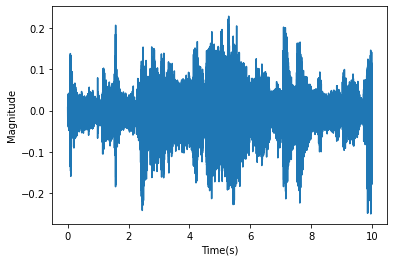

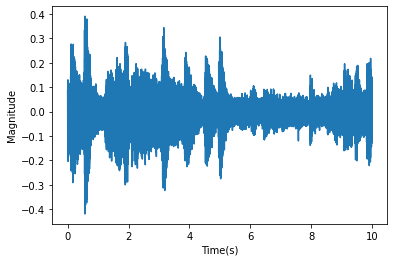

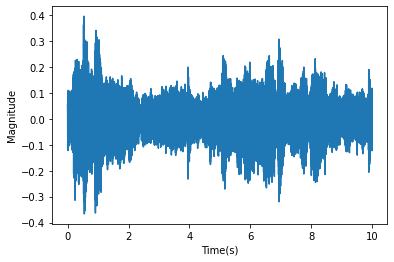

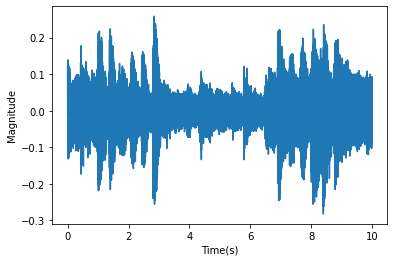

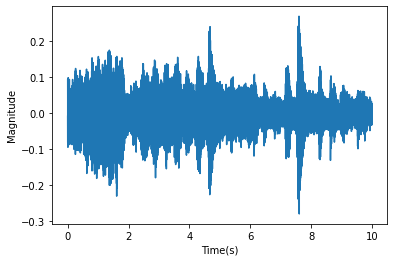

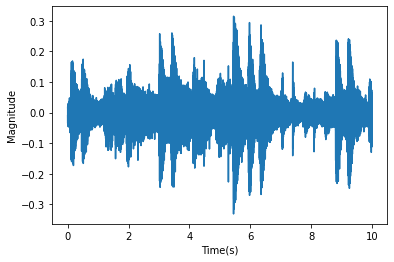

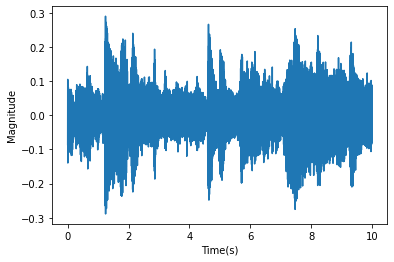

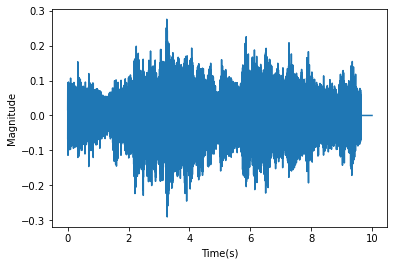

In [ ]:
for i in range(0,len(x_music),1):
    time = np.arange(0,len(x_music[i]))/Fs
    fig, ax = plt.subplots()
    ax.plot(time,x_music[i])
    ax.set(xlabel = "Time(s)", ylabel = "Magnitude")
    plt.show()

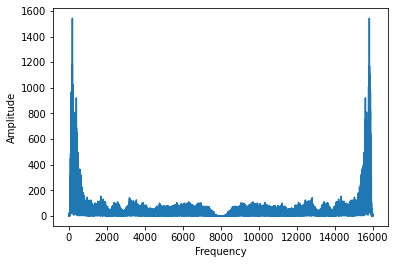

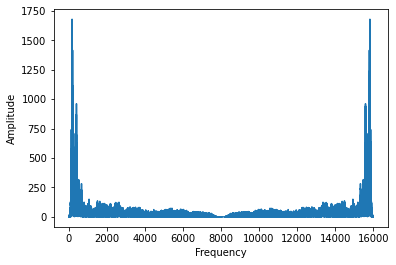

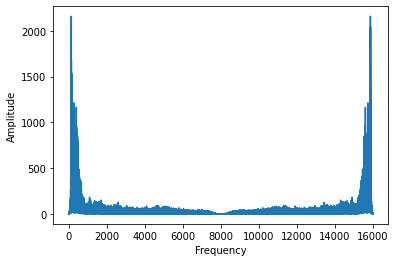

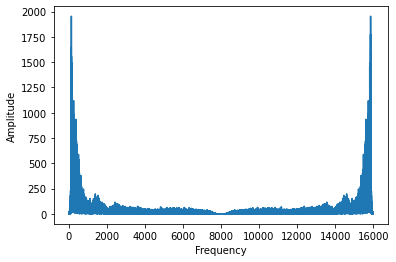

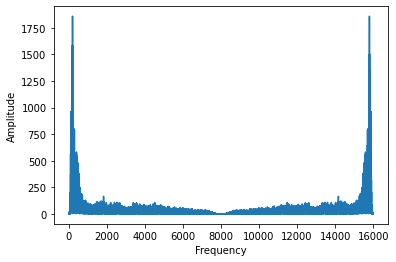

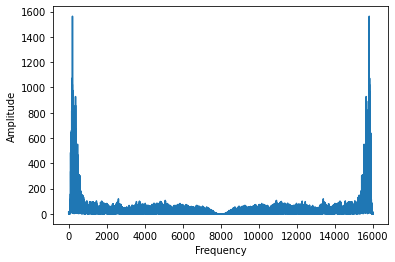

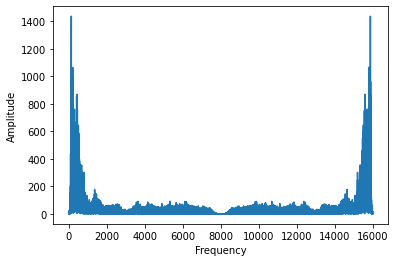

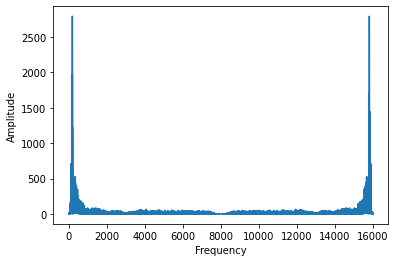

In [ ]:
for i in range(0,len(x_speech),1):
    fft = np.fft.fft(x_speech[i])
    magnitude = np.abs(fft)
    frequency = np.linspace(0,Fs,len(magnitude))
    plt.plot(frequency,magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

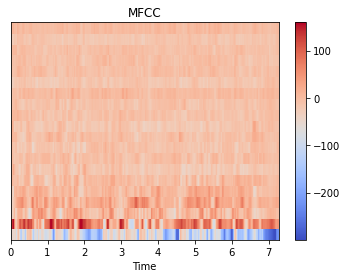

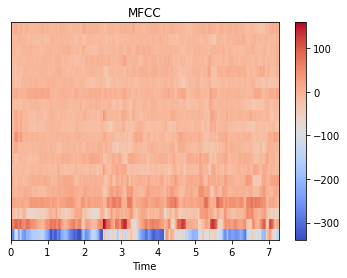

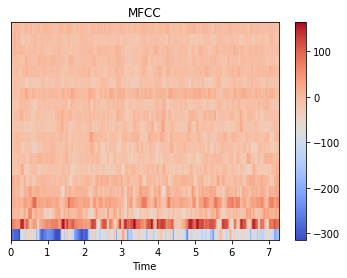

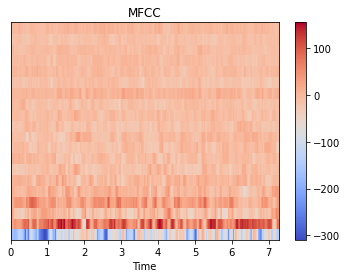

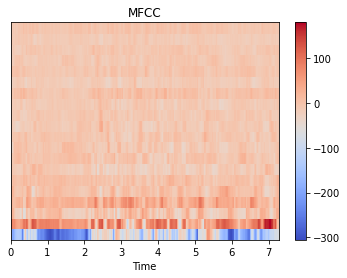

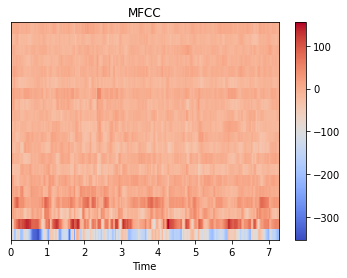

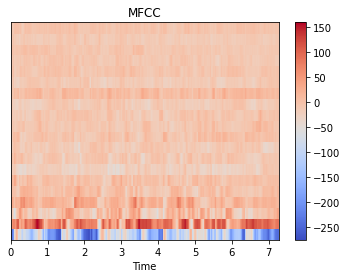

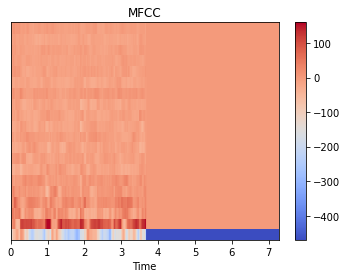

In [ ]:
#spectrogram speech
for i in range(0,len(x_speech)):
    mfccs = librosa.feature.mfcc(x_speech[i], sr=Fs, n_mfcc = 20)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')

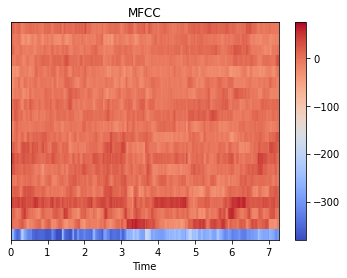

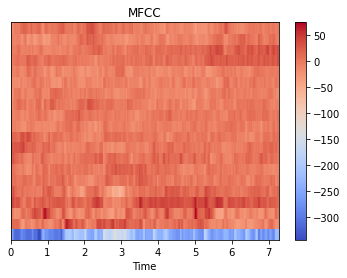

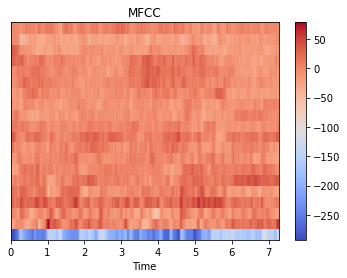

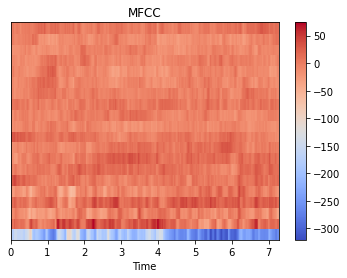

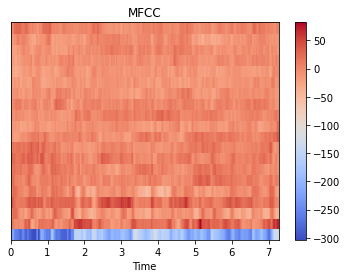

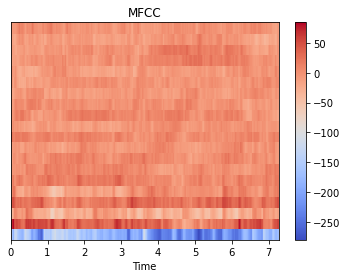

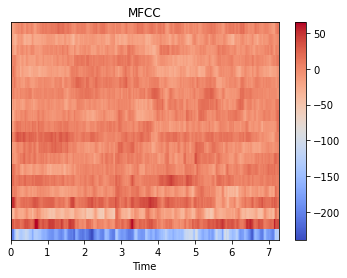

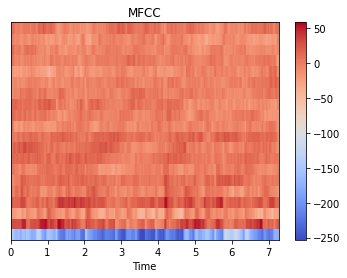

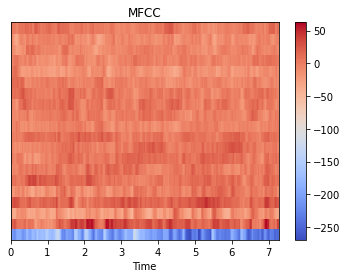

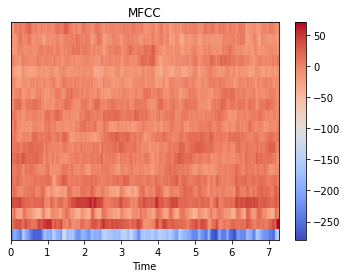

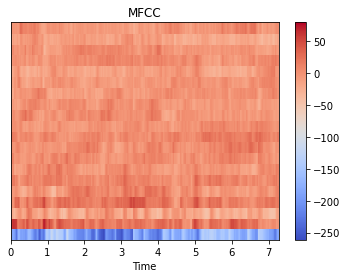

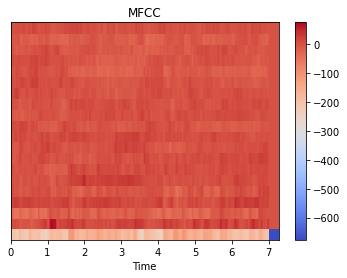

In [ ]:
#spectrogram music
for i in range(0,len(x_music)):
    mfccs = librosa.feature.mfcc(x_music[i], sr=Fs, n_mfcc = 20)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')

# Wave-forms


We will plot different types of waveforms that we studied in lecture using python, numpy and matplotlib  

In [ ]:
# first of all let's import all kind of library that we will use
import matplotlib.pyplot as plot
import numpy as np
from scipy import signal

###Sine Wave



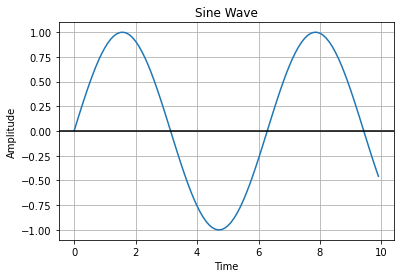

In [ ]:
#sampling rate 100Hz / second
time = np.arange(0,10,0.1);

amplitude = np.sin(time)

#plot the sine wave
plot.plot(time,amplitude)

#Giving the title
plot.title('Sine Wave')

#Give X-axis label
plot.xlabel('Time')

#make grid
plot.grid(True, which='both')

#make horizontal x-axis line
plot.axhline(y=0, color='k')

#Give y-axis label
plot.ylabel('Amplitude')

plot.show()

###Square Wave

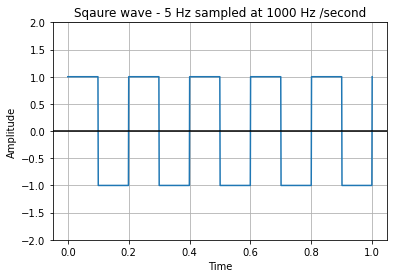

In [ ]:
# Sampling rate 1000 hz / second

t = np.linspace(0, 1, 1000, endpoint=True)

 

# Plot the square wave signal

plot.plot(t, signal.square(2 * np.pi * 5 * t))

 

# Give a title for the square wave plot

plot.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')

 

# Give x axis label for the square wave plot

plot.xlabel('Time')

 

# Give y axis label for the square wave plot

plot.ylabel('Amplitude')

 

plot.grid(True, which='both')

 

# Provide x axis and line color

plot.axhline(y=0, color='k')

 

# Set the max and min values for y axis

plot.ylim(-2, 2)

 

# Display the square wave drawn

plot.show()

###Triangle Waveform

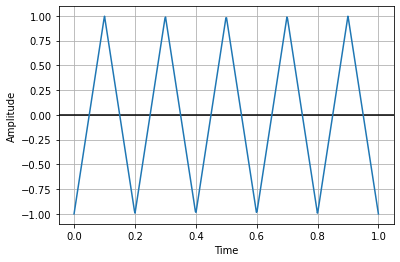

In [ ]:
#triangle wave of frequency 500Hz
t = np.linspace(0, 1, 500)
triangle = signal.sawtooth(2 * np.pi * 5 * t, 0.5)
# Give x axis label for the square wave plot

plot.xlabel('Time')

 

# Give y axis label for the square wave plot

plot.ylabel('Amplitude')

 

plot.grid(True, which='both')

 

# Provide x axis and line color

plot.axhline(y=0, color='k')
plot.plot(t, triangle)

###Sawtooth Wave

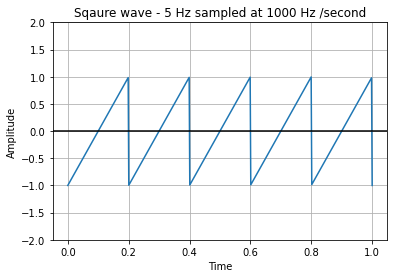

In [ ]:
# Create 1000 linearly separated points with values between 0 to 1

timePoints = np.linspace(0, 1, 500)

# Sawtooth wave frequency 5Hz; sampling frequency 500 Hz

plot.plot(timePoints, signal.sawtooth(2 * np.pi * 5 * timePoints))

 

# Give a title for the sawtooth wave plot

plot.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')

 

# Give x axis label for the sawtooth wave plot

plot.xlabel('Time')

 

# Give y axis label for the sawtooth wave plot

plot.ylabel('Amplitude')

 

plot.grid(True, which='both')

 

# Provide x axis and line color

plot.axhline(y=0, color='k')

 

# Set the max and min values for y axis

plot.ylim(-2, 2)

 

# Display the sawtooth wave plotted

plot.show()
